# Práctica 1. Parte 2. _Apendicitis_

Instalamos las dependencias de este código en primer lugar (`%%capture` sirve para que no se muestren las salidas de la celda)

In [19]:
%%capture
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings

warnings.filterwarnings("ignore") # Algunos métodos van a estar obsoletos en futuras versiones

## 1. Enunciado
El objetivo de esta práctica es entrenar una neurona artiﬁcial para que sea capaz de detectar si un paciente puede o menos sufrir de apendicitis.

En primer lugar hay que descargar los archivos appendicitis.dat y muestra\_pacientes.dat de la base de datos keel Dataset ([enlace](https://sci2s.ugr.es/keel/dataset.php?cod=183))

In [21]:
# Carga de los datos del dataset de entrenamiento:
data = pd.read_csv('appendicitis/data.csv')

# Añadimos una columna con unos a la izquierda para el peso que multiplica a x0
data.insert(0, 'unos', 1)

In [22]:
# Dividimos en porcentaje de entrenamiento y prueba:
train_percent = 1
test_percent = 1 - train_percent

train_data = data.sample(frac=train_percent)
test_data = data.copy().drop(train_data.index)

Una vez la neurona pueda leer el archivo se pide:

1\. Añadir como opción una función de salida que proceda de f (p) = sin(p) en [−1, 1] con imagen en el intervalo apropiado.

<div style="color: DodgerBlue;">Para obtener los puntos de inflepión de f(p), obtenemos la primera derivada:
<center><i>f'(p) = cos(p)</i></center>

A continuación sacamos la segunda derivada para igualarla a 0:
<center><i>f''(p) = -sin(p) = 0</i></center>

Esta ecuación tiene todas las soluciones en siendo p=0. Por ello podemos concluir que sin(p) tiene un <strong>punto de inflexión importante para nosotros en p=0</strong>.</div>

In [23]:
# Para los puntos de inflexión:
def inflection_points(x, y):
    # Puntos de inflexión:
    second_derivative = np.gradient(np.gradient(y))
    return x[np.where(np.diff(np.sign(second_derivative)))[0]]

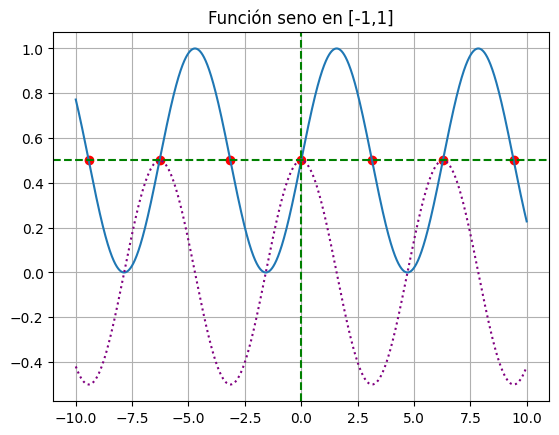

In [24]:
# Función 1
def sin(x):
    """Calcula el seno de un número x, con imagen entre 0 y 1."""
    # Normalización de la imagen al intervalo [0,1]
    return np.sin(x) / 2 + 0.5


def derivada_sin(x):
    """Calcula la derivada del seno de un número x."""
    return np.cos(x) / 2


x = np.linspace(-10, 10, 100000)
f_x = sin(x)
derivada = derivada_sin(x)

plt.plot(x, f_x)
plt.plot(x, derivada, ls=":", color="purple")
plt.title("Función seno en [-1,1]")
plt.axvline(x=0, color="g", linestyle="--")
plt.axhline(y=0.5, color="g", linestyle="--")

points = inflection_points(x, f_x)

# Representamos los punto de inflexión
plt.scatter(points, sin(points), color="r")

plt.grid()
plt.show()

2\. Añadir como opción una función de salida que proceda de f(_p_) = 1/(1+ _e_<sup>−p</sup>) en (0, 1), con imagen en el intervalo apropiado

<div style="color: DodgerBlue;">Para obtener los puntos de inflexión de f(p), obtenemos la primera derivada:
<center><i>f'(p) = e^(-p)/(2 e^(-p) + (e^(-p))^2 + 1)</i></center>

A continuación sacamos la segunda derivada para igualarla a 0:
<center><i>f''(p) = (-e^(-p) + (e^-p)^2) / (3 e^(-p) + (e^(-p)^3) + 3 (e^(-p)^2) + 1) = 0</i></center>

<strong>El punto de inflexión está en (0, 0.5)</strong></div>

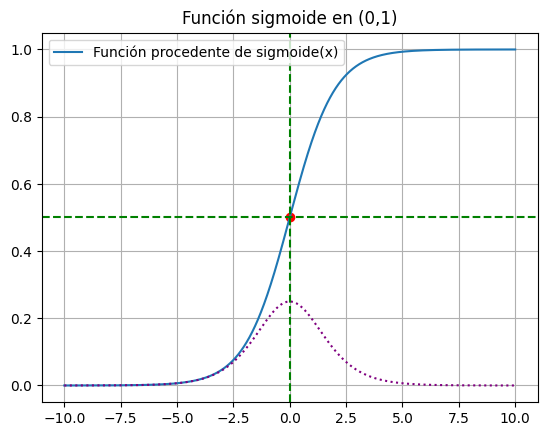

In [25]:
# Función 2
def sigmoide(x):
    """Calcula el valor de la función f(x) = 1/(1 + e^(-x)), con
    imagen entre 0 y 1."""

    # Nótese que sigmoide(0) = 0 y sigmoide(1) = 1, luego no habría problema con esos valores.

    return 1 / (1 + np.exp(-x))


def derivada_sigmoide(x):
    """Calcula la derivada de la función sigmoide en x."""
    return np.exp(-x) / (2 * np.exp(-x) + (np.exp(-x)) ** 2 + 1)


# Representamos esta función en el intervalo correspondiente para
# cerciorarnos de su correcta definición:

x = np.linspace(-10, 10, 100000)
f_x = sigmoide(x)
derivada = derivada_sigmoide(x)

plt.plot(x, f_x)
plt.plot(x, derivada, ls=":", color="purple")
plt.title("Función sigmoide en (0,1)")
plt.axvline(x=0, color="g", linestyle="--")
plt.axhline(y=0.5, color="g", linestyle="--")

points = inflection_points(x, f_x)

# Representamos los punto de inflexión
plt.scatter(points, sigmoide(points), color="r")

plt.grid()
plt.legend(["Función procedente de sigmoide(x)"])
plt.show()

3\. Añadir como opción una función de salida que proceda de f (p) = ex p(−p<sup>2</sup>) en (0, 1] con imagen en el
intervalo apropiado

<div style="color: DodgerBlue;">Para obtener los puntos de inflexión de f(p), obtenemos la primera derivada:
<center><i>f'(p) = -2p e^(-p^2)</i></center>

A continuación sacamos la segunda derivada para igualarla a 0:
<center><i>f''(p) = -2 e^(-p^2) + 4 p^2 e^(-p^2) = 0</i></center>

Esta ecuación tiene 2 puntos de inflexión en p=-1 y p=1, <strong>cuyo valor es e^-1</strong></div>

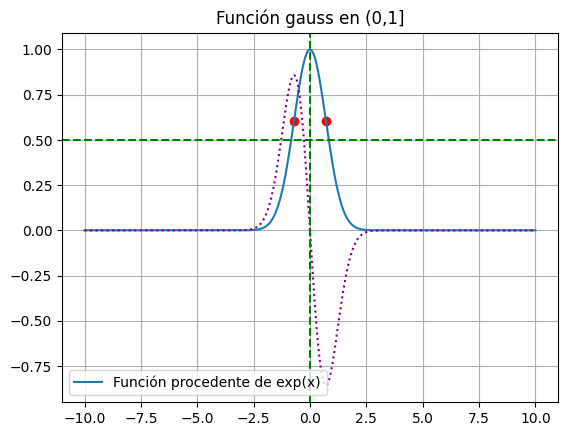

In [26]:
# Función 3
def gauss(x):
    """Calcula el valor de la función f(x) = e^-(x^2), con imagen entre 0 y 1."""

    # Normalización de la imagen al intervalo [0,1]
    return np.exp(-(x**2))

def derivada_gauss(x):
    """Calcula la derivada de la función gauss en x."""
    return -2 * x * np.exp(-(x**2))

# Representamos esta función en el intervalo correspondiente para
# cerciorarnos de su correcta definición:

x = np.linspace(-10, 10, 100000)
f_x = gauss(x)
derivada = derivada_gauss(x)

plt.plot(x, f_x)
plt.plot(x, derivada, ls=":", color="purple")
plt.title("Función gauss en (0,1]")
plt.axvline(x=0, color="g", linestyle="--")
plt.axhline(y=0.5, color="g", linestyle="--")

points = inflection_points(x, f_x)

# Representamos los punto de inflexión
plt.scatter(points, gauss(points), color="r")

plt.grid()
plt.legend(["Función procedente de exp(x)"])
plt.show()

4\. Añadir como opción una función de salida que proceda de f(_p_) = _p_/(1 + (_p_<sup>2</sup>)) en [−0,5, 0,5], con imagen

<div style="color: DodgerBlue;">Para obtener los puntos de inflexión de f(p), obtenemos la primera derivada:
<center><i>f'(p) = (-p^2 + 1) p / (p^4 + 2p^2 + 1)</i></center>

A continuación sacamos la segunda derivada para igualarla a 0:
<center><i>f''(p) = (2p^3 - 6p) / (p^6 + 3p^4 + 3p^2 + 1) = 0</i></center>

Esta ecuación tiene tres soluciones en siendo p=-sqrt(3), 0 y sqrt(3). El que más nos interesa es el <strong> punto de inflexión en (0, 0.5) </strong>.</div>

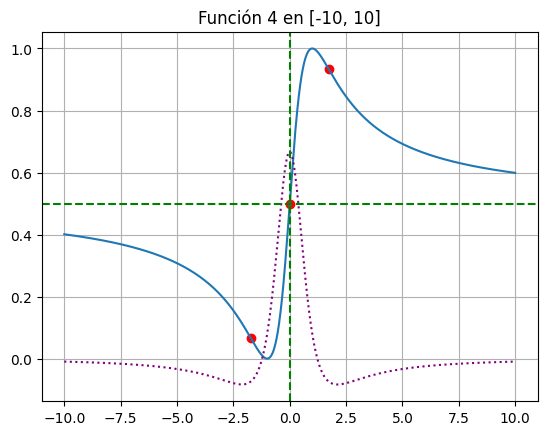

In [27]:
# Función 4
# Ya que no he encontrado un nombre común a esta función, la he llamado 'fun_p'
def fun_p(x):
    """Calcula el valor de la función f(x) = x/(1 + x^2), con
    imagen entre 0 y 1."""
    return x / (1 + x**2) + 0.5


def derivada_fun_p(x):
    """Calcula la derivada de la función fun_p en x."""
    return (-4 * x**2 + 6) / (4 * x**4 + 12 * x**2 + 9)


# Representamos esta función en el intervalo correspondiente para
# cerciorarnos de su correcta definición:

x = np.linspace(-10, 10, 100000)
f_x = fun_p(x)
derivada = derivada_fun_p(x)

plt.plot(x, f_x)
plt.plot(x, derivada, ls=":", color="purple")
plt.title("Función 4 en [-10, 10]")
plt.axvline(x=0, color="g", linestyle="--")
plt.axhline(y=0.5, color="g", linestyle="--")

points = inflection_points(x, f_x)

# Representamos los punto de inflexión
plt.scatter(points, fun_p(points), color="r")

plt.grid()
plt.show()

6\. Añadir la opción de enfriamiento simulado al la razón de aprendizaje. La razón η ha de ser una función decreciente que dependa del tiempo. Por ejemplo η(t) = −1/(1 + exp(−4m(t − c))) + 1 siendo m y c parámetros a ajustar

In [28]:
def aprendizaje(t: int, m: float, c: float, epochs: int) -> float:
    """Calcula la tasa de aprendizaje en función de la iteración, y dos parámetros (m y c)"""
    # Partimos de que la η inicial es 0.1, para ajustar más fácilmente la función entre valores comunes para la tasa de aprendizaje
    return 0.1 * (1 - 1 / (1 + math.exp(-4 * m * (t - c*3/4*epochs))))


<div style="color: DodgerBlue;">Con unas pocas pruebas de tanteo podemos ver que unos posibles valores para las constantes son m=0.005 y c=-6</div>

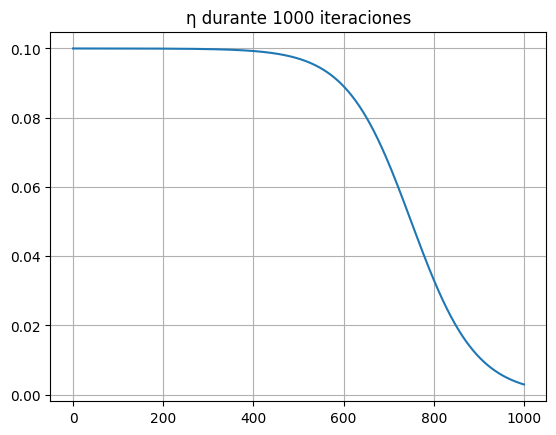

In [29]:
# Representamos el aprendizaje con esos valores:
m = 0.0035
c = 1
epochs = 1000
t = np.linspace(0,1000,1001)
aprendizaje_x = [aprendizaje(i, m, c, epochs) for i in t]

plt.plot(t, aprendizaje_x)
plt.title("η durante 1000 iteraciones")

plt.grid()
plt.show()

7\. Ajustar los valores de los parámetros error aceptable, ratio de aprendizaje y tiempo máximo para obtener un mínimo de 98 muestras bien aproximadas. Escribir las pruebas con las que se ha obtenido la mejor aproximación. Función de salida, t<sub>max</sub>, η(m, c), error normalizado/muestras

In [30]:
# Creamos una funcion para entrenar al perceptron de clasificación:
def entrenar_perceptron(
    train_data,
    max_iter,
    max_error,
    m,
    c,
    fun_activacion: callable,
    derivada_fun_activacion: callable,
    porcentaje_activacion,
    enfriamiento_simulado=False,
    eta=0.1,
):
    # Inicializamos los pesos y el sesgo
    w = np.random.rand(1, train_data.shape[1] - 1)

    # Inicializamos el error
    error = math.inf

    # Inicializamos la tasa de aprendizaje
    aprend = eta

    # Inicializamos la iteración
    iter = 0

    # Creamos un vector para los errores:
    errores = []

    # Mientras no se alcance el error máximo y no se alcance el número máximo de iteraciones
    while error > max_error and iter < max_iter:
        # Inicializamos el error a 0
        error = 0

        if enfriamiento_simulado:
            # Calculamos la tasa de aprendizaje
            aprend = aprendizaje(iter, m, c, max_iter)

        # Iteramos sobre el conjunto de entrenamiento
        for index, row in train_data.iterrows():
            # Extraemos las características y la clase
            x = row[:-1].values
            y = row[-1]

            # Calculamos la salida del perceptrón
            z = np.dot(w, x)
            y_pred = fun_activacion(z)
            clasificacion = 1 if y_pred >= porcentaje_activacion else 0

            # Calculamos el error
            error += np.abs((y - clasificacion))

            # Actualizamos los pesos con regla delta
            w = w + aprend * (y - y_pred) * x * derivada_fun_activacion(z)

        # Añadimos el error a la lista de errores
        errores.append(error)

        # Incrementamos el número de iteraciones
        iter += 1

    return w, errores, iter

In [31]:
# Evaluamos el entrenamiento con el conjunto de test
def evaluar_perceptron(test_data, w, fun_activacion: callable, porcentaje_activacion):
    # Inicializamos el error
    error = 0

    # Iteramos sobre el conjunto de test
    for index, row in test_data.iterrows():
        # Extraemos las características y la clase
        x = row[:-1].values
        y = row[-1]

        # Calculamos la salida del perceptrón
        z = np.dot(w, x)
        y_pred = fun_activacion(z)
        clasificacion = 1 if y_pred >= porcentaje_activacion else 0

        # Calculamos el error
        error += np.abs((y - clasificacion))

    return error / len(test_data)

Sigmoide:
Pesos: [[ 3.69892024 -4.6858918  -0.20202765 -4.00684361 -4.37105328 -2.16496166
  -0.61036258 -4.00344501]] 	mal clasificados en train: 9.0 de 106

Seno:
Pesos: [[ 1.50851153  3.58352945  0.59190097 -0.01450869  3.31965798 -3.04090975
   0.31354741  1.02935087]] 	mal clasificados en train: 9.0 de 106

gauss:
Pesos: [[-0.96992315  2.88181663  0.31588185  1.23030568  1.5185322   1.69126252
   0.60145962  0.92452594]] 	mal clasificados en train: 12.0 de 106

Fun_p:
Pesos: [[10.72501771  5.0482113   8.62929265  5.40949048  3.26074373  3.04738943
   8.49960216  5.14010659]] 	mal clasificados en train: 21.0 de 106



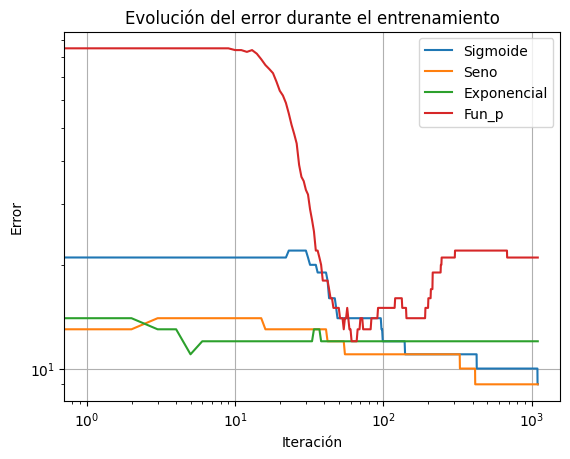

In [63]:
# Parámetros aceptables
max_error = 2
max_iter = 1100
p = 0.6
p_2 = math.exp(-1)
enfr = True
eta = 0.1  # Si enfr es True, eta no se usa
# 0.4 con enfriamiento btt bn

w_sig, errores_sigm, iter = entrenar_perceptron(train_data, max_iter, max_error, m, c, sigmoide, derivada_sigmoide, p, False, eta)
print("Sigmoide:")
print("Pesos:",w_sig ,"\tmal clasificados en train:", errores_sigm[-1],"de", len(train_data))
if (test_percent != 0):
    print("Error con los tests:", evaluar_perceptron(test_data, w_sig, sigmoide, p))
print()

w_sin, errores_sin, iter = entrenar_perceptron(train_data, max_iter, max_error, m, c, sin, derivada_sin, p, False, eta)
print("Seno:")
print("Pesos:",w_sin ,"\tmal clasificados en train:", errores_sin[-1],"de", len(train_data))
if (test_percent != 0):
    print("Error con los tests:", evaluar_perceptron(test_data, w_sin, sin, p))
print()

w_exp, errores_gauss, iter = entrenar_perceptron(train_data, max_iter, max_error, m, c, gauss, derivada_gauss, p_2, False, eta)
print("gauss:")
print("Pesos:",w_exp ,"\tmal clasificados en train:", errores_gauss[-1],"de", len(train_data))
if (test_percent != 0):
    print("Error con los tests:", evaluar_perceptron(test_data, w_exp, gauss, p_2))
print()

w_fun, errores_fun_p, iter = entrenar_perceptron(train_data, max_iter, max_error, m, c, fun_p, derivada_fun_p, p, False, eta)
print("Fun_p:")
print("Pesos:",w_fun ,"\tmal clasificados en train:", errores_fun_p[-1],"de", len(train_data))
if (test_percent != 0):
    print("Error con los tests:", evaluar_perceptron(test_data, w_fun, fun_p, p))
print()



# Dibujar evolucion del error
plt.loglog(errores_sigm)
plt.loglog(errores_sin)
plt.loglog(errores_gauss)
plt.loglog(errores_fun_p)
plt.title("Evolución del error durante el entrenamiento")
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.legend(["Sigmoide", "Seno", "Exponencial", "Fun_p"])
plt.grid()
plt.show()

# El objetivo de 98 muestras de entrenamiento bien aproximadas es obtener 8 errores o menos


<div style="color: DodgerBlue;">
Hice la ejecución de 2 formas, obteniendo los siguientes resultados:

<ol>
<li>
Sin división entrenamiento/test:
El mejor resultado fue con la función de activación 2, la senoidal, obteniendo <strong>97 muestras bien aproximadas</strong>. Otros parametros fueron:
<ul>
<li>η(m, c) = -1/(1 + exp(-4m(t - c))) + 1, con m=0.0035 y c=1</li>
<li>t<sub>max</sub> = 1100</li>
<li>clasificando 1 a toda salida igual o superior a 0.6, y 0 al resto.</li>
<li>Enfriamiento simulado: sí</li>
</ul>
En algunas ocasiones este mismo resultado se obtuvo también con los mismos parámetros usando la función de activación sigmoidal.
</li>
<li>
Con división entrenamiento/test:
El mejor resultado fue con la función de activación 2, la senoidal, obteniendo solo 7 de 64 fallos durante el entrenamiento y con <strong> un 93% de acierto en el test</strong>. Otros parametros fueron:
<ul>
<li>η(m, c) = -1/(1 + exp(-4m(t - c))) + 1, con m=0.0035 y c=1</li>
<li>t<sub>max</sub> = 7000</li>
<li>clasificando 1 a toda salida igual o superior a 0.6, y 0 al resto.</li>
<li>Enfriamiento simulado: sí</li>
</ul>

![Output](output.png)


Sin embargo, en algunas ocasiones, esta ejecución no dio lugar a los resultados descritos debido a la aleatoriedad de la inicialización de los pesos.
</ol>

Aun así, no me conformé con eso, y desarrollé el siguiente código para probar una clasificación con un perceptrón de biblioteca, sin ninguna modificación. Los resultados fueron mejores, como se puede ver en la siguiente celda.</div>


In [61]:
# Probamos un perceptron de librería para los datos:
from sklearn.linear_model import Perceptron

# Entrenamos el perceptrón
perceptron = Perceptron()
perceptron.fit(train_data.iloc[:, :-1], train_data.iloc[:, -1])

# Calculamos el error cuadrático medio
y_hat = perceptron.predict(train_data.iloc[:, :-1])
error = train_data.iloc[:, -1] - y_hat
print("Fallos en entrenamiento", np.abs(np.sum(error-y_hat)))

# Comparamos los pesos obtenidos con los de nuestra implementación
print("Pesos obtenidos por la librería:", perceptron.coef_)

# Probamos el conjunto de test
if (test_percent != 0):
    y_hat = perceptron.predict(test_data.iloc[:, :-1])
    error = test_data.iloc[:, -1] - y_hat
    print("Fallos en test", np.abs(np.sum(error-y_hat)), "de", len(test_data), ":", np.abs(np.sum(error-y_hat)/len(test_data)))

Fallos en entrenamiento 7
Pesos obtenidos por la librería: [[ 1.    -1.804 -1.402 -1.946 -4.787 -2.784 -2.105 -1.528]]


8\. utilizar la neurona con la mejor opción para diagnosticar al paciente  = (0,098, 0,607, 0,123, 0,042, 0,016, 0,67, 0,105),(1.1)
si tiene apendicitis (Si/No/Varia) mejor opción: función de salida t<sub>max</sub>, η(m, c) error normalizado/muestras

In [62]:
paciente = [1, 0.098, 0.607, 0.123, 0.042, 0.016, 0.67, 0.105]

print("Sigmoide:", sigmoide(np.dot(w_sig, paciente)), "->", sigmoide(np.dot(w_sig, paciente)) >= p)
print("Seno:", sin(np.dot(w_sin, paciente)), "->", sin(np.dot(w_sin, paciente)) >= p)
print("gauss:", gauss(np.dot(w_exp, paciente)), "->", gauss(np.dot(w_exp, paciente))>=p)
print("Fun_p:", fun_p(np.dot(w_fun, paciente)), "->", fun_p(np.dot(w_fun, paciente)) >= p)

# Probamos con un perceptrón de librería
print("Perceptrón de librería:", perceptron.predict([paciente]))

Sigmoide: [0.82823008] -> [ True]
Seno: [0.74429834] -> [ True]
gauss: [0.9382623] -> [ True]
Fun_p: [0.54267788] -> [False]
Perceptrón de librería: [0]


<div style="color: DodgerBlue;">Vemos que con los mejores parámetros obtenidos en el punto 7, las neuronas sigmoidal y senoidal clasifican al paciente como que <strong>sí tiene apendicitis</strong>, mientras que la biblioteca no. Quizá podamos descartar la neurona que niega la apendicitis por estar cerca del umbral establecido, mientras que las que la señalan están bastante cerca de 1.

<em>Nótese que es fácil que al reejecutar todo el código de nuevo, las anotaciones como esta no apliquen a las salidas de las celdas. Todas estas explicaciones han sido desarrolladas para el fichero subido a <a href="agora.unileon.es">agora.unileon.es</a> y sus salidas en la ejecución entregada.</em></div>